In [3]:
import pandas as pd
import twint
import nltk
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import sys
import numpy as np
import os
import string


In [51]:
df=pd.read_csv("NFT.csv")


C:\Users\hemad\AppData\Local\Temp\ipykernel_11280\3045124644.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("NFT.csv")


In [36]:
df.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [52]:
columns_list = ['conversation_id', 'created_at', 'timezone',
       'user_id', 'username', 'name', 'place','mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest' ]
df.drop(columns_list, axis = 1, inplace= True)

In [53]:
df.shape

(210316, 5)

In [39]:
df.head()

id        date      time  \
0  1520237206128177153  2022-04-30  05:02:49   
1  1520237205666807810  2022-04-30  05:02:49   
2  1520237205046067200  2022-04-30  05:02:48   
3  1520237204152340481  2022-04-30  05:02:48   
4  1520237204135878656  2022-04-30  05:02:48   

                                               tweet language  
0  Hey @Honeysi90,  I help run @infinite_arcade a...       en  
1  @NekoryMoonlight Follow &amp; DM @NFTAlphaAwar...       en  
2  @Tripsters Cant wait for Tripsters!!!! lets go...       en  
3  @fahoudyuh You must check MintHuntersNFT. Made...       en  
4  @TheHeira @NFT_newsglobal @Mill_Mentor @joeyhi...      und

In [54]:
df_clean = df[df['language'] == "en"]

In [41]:
df_clean.head()

id        date      time  \
0  1520237206128177153  2022-04-30  05:02:49   
1  1520237205666807810  2022-04-30  05:02:49   
2  1520237205046067200  2022-04-30  05:02:48   
3  1520237204152340481  2022-04-30  05:02:48   
5  1520237203342823435  2022-04-30  05:02:48   

                                               tweet language  
0  Hey @Honeysi90,  I help run @infinite_arcade a...       en  
1  @NekoryMoonlight Follow &amp; DM @NFTAlphaAwar...       en  
2  @Tripsters Cant wait for Tripsters!!!! lets go...       en  
3  @fahoudyuh You must check MintHuntersNFT. Made...       en  
5  Hey @hakanoyan4,  I help run @infinite_arcade ...       en

In [11]:
df_clean.to_csv("NFT_EN_Clean.csv")

In [55]:
df_clean.shape

(84060, 5)

In [56]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

df_clean['stopwords'] = df_clean['tweet'].apply(lambda x: len([x for x in x.split() if x in stop]))
df_clean[['stopwords']].head()

C:\Users\hemad\AppData\Local\Temp\ipykernel_11280\3223441145.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['stopwords'] = df_clean['tweet'].apply(lambda x: len([x for x in x.split() if x in stop]))


stopwords
0         11
1          1
3          2
4         13
5          2

In [57]:
def cleanHtml(sentence): 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext

def cleanPunc(sentence): 
    cleaned = re.sub(r'[?|!|\'|"|#]',r' ',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/|_|-]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned

def keepAlpha(sentence): 
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent


def decontraction(text):         
    text = re.sub(r"won\'t", "will not", text)
    text = re.sub(r"can\'t", "can not", text)

    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    
    return text
df_clean['tweet'] = df_clean['tweet'].str.lower()
df_clean['tweet'] = df_clean['tweet'].apply(cleanHtml)
df_clean['tweet'] = df_clean['tweet'].apply(cleanPunc)
df_clean['tweet'] = df_clean['tweet'].apply(keepAlpha)
df_clean['tweet'] = df_clean['tweet'].apply(decontraction)

C:\Users\hemad\AppData\Local\Temp\ipykernel_11280\1736003073.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['tweet'] = df_clean['tweet'].str.lower()
C:\Users\hemad\AppData\Local\Temp\ipykernel_11280\1736003073.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['tweet'] = df_clean['tweet'].apply(cleanHtml)
C:\Users\hemad\AppData\Local\Temp\ipykernel_11280\1736003073.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

In [58]:
from nltk.corpus import stopwords
stop_words = list(set(stopwords.words('english')))
len(stop_words)
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)
df_clean['tweet'] = df_clean['tweet'].apply(removeStopWords)

C:\Users\hemad\AppData\Local\Temp\ipykernel_11280\46177342.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['tweet'] = df_clean['tweet'].apply(removeStopWords)


In [59]:
df_clean.head()

id        date      time  \
0  1519696162415996929  2022-04-28  17:12:54   
1  1519696162143440897  2022-04-28  17:12:54   
3  1519696161556336640  2022-04-28  17:12:54   
4  1519696161346506754  2022-04-28  17:12:54   
5  1519696161333858304  2022-04-28  17:12:54   

                                               tweet language  stopwords  
0  playcryptoballz strong project    happy   part...       en         11  
1  cnfthoarder  derpbirdsnft  artderp nft dm  ave...       en          1  
3           get nft land   subscription  cgmetaverse       en          2  
4  guppydfish  veezyvangogh  yommsies  isekaimeta...       en         13  
5                         love    dm   nft community       en          2

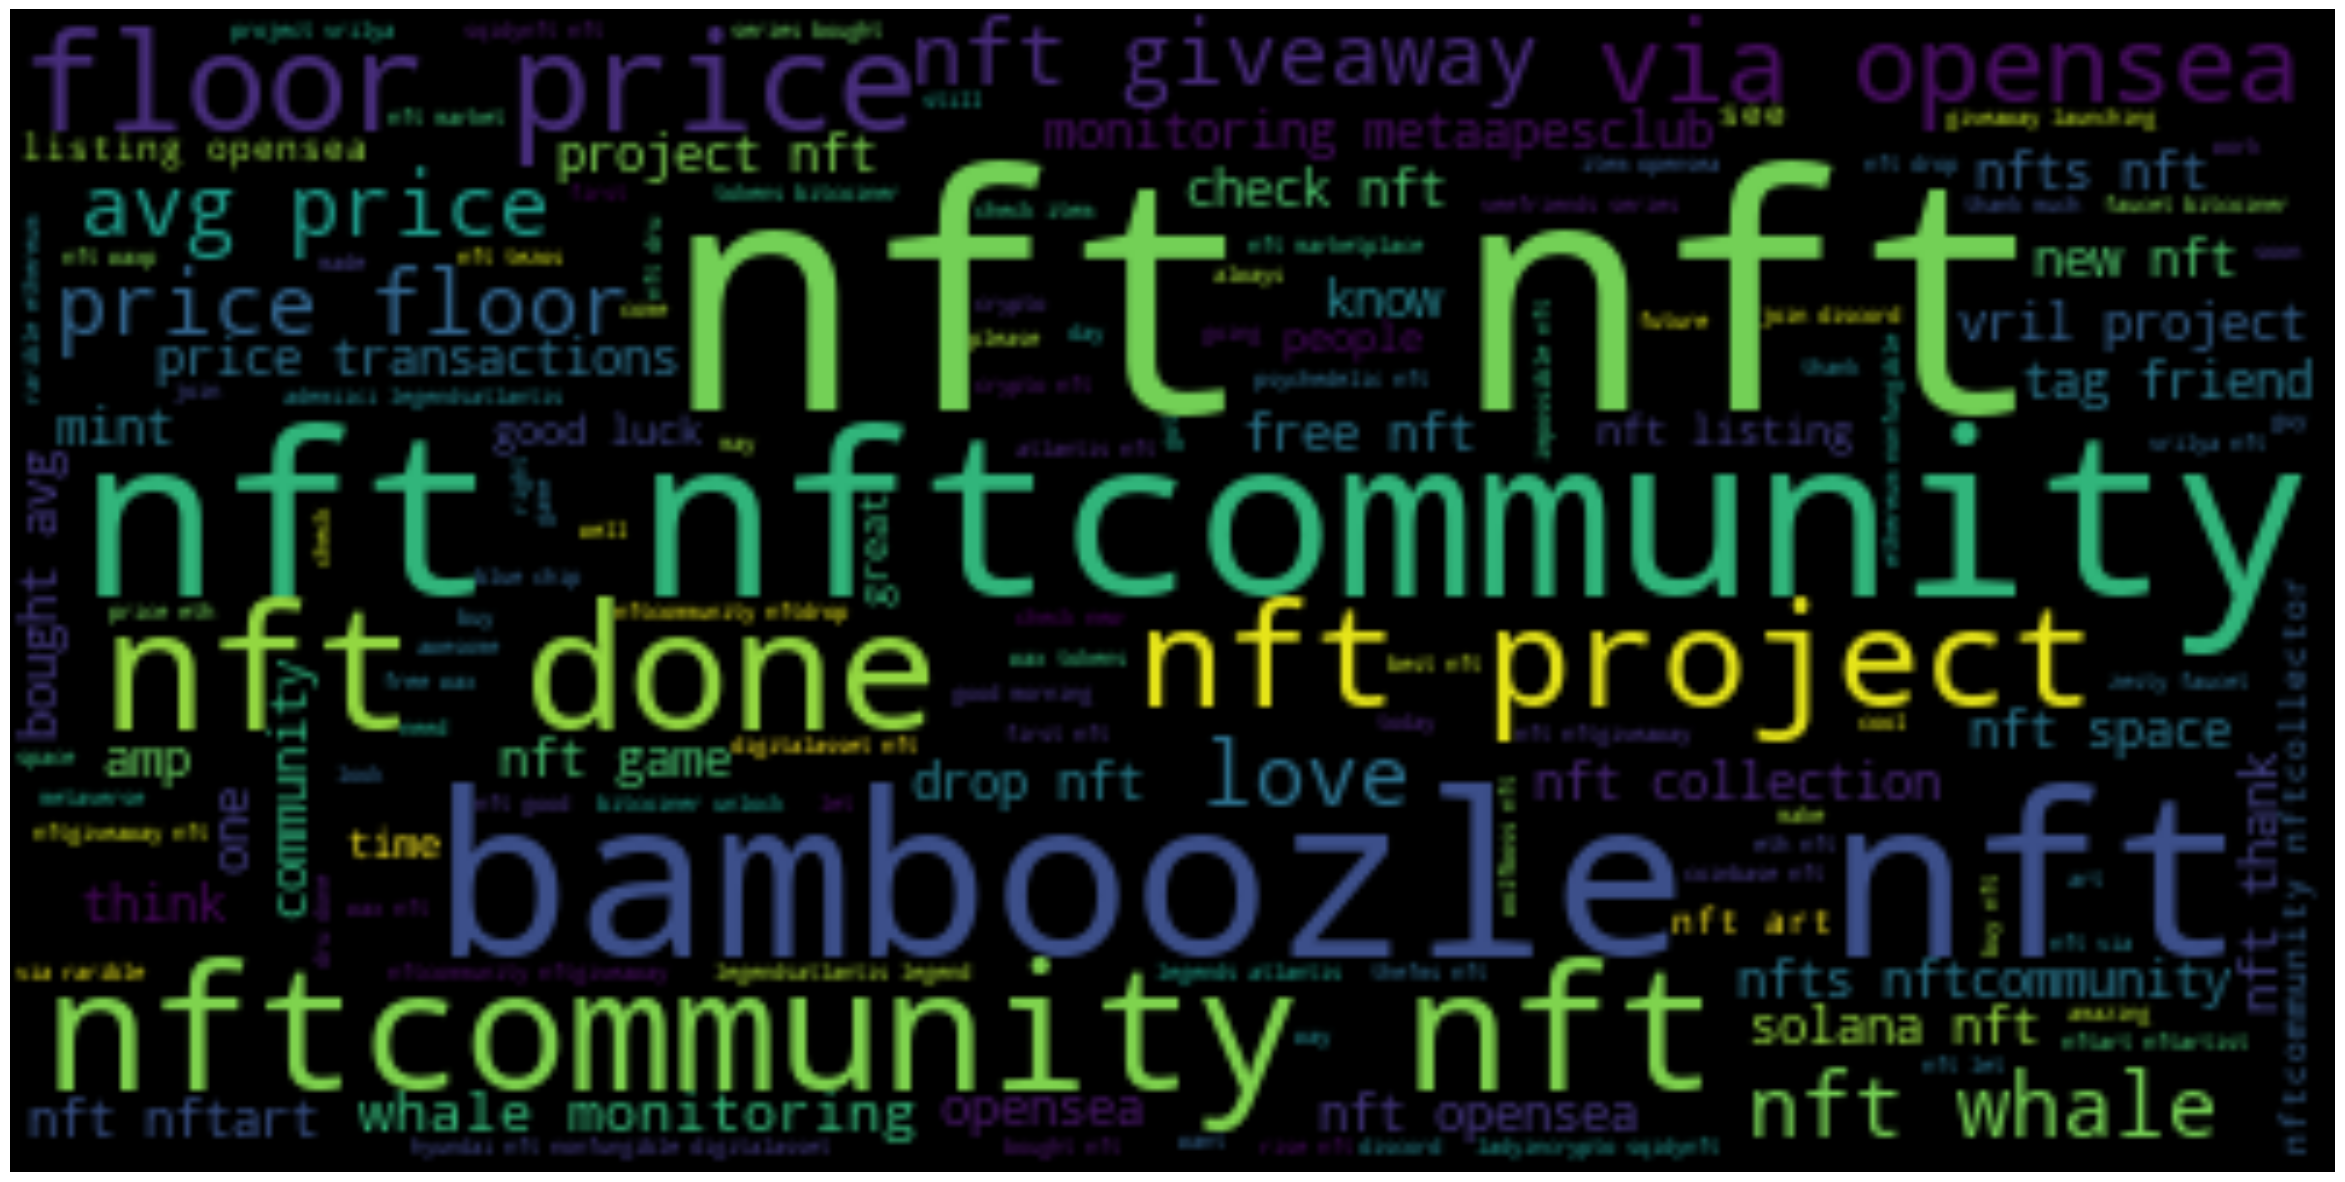

In [60]:
words_to_exclude = ["NFT", "Solana", "Ethereum", "https"]

def create_wordcloud(text):
    #mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    cleaned_word = " ".join([word for word in text.split()
                            if all(ele not in word for ele in words_to_exclude)
                                and not word.startswith('@')
                                and word != 'RT'])
    wc = WordCloud(
    #mask = mask,
    max_words=3000,
    min_word_length =3,
    collocation_threshold = 20,
    stopwords=stopwords,
    repeat=True)
    wc.generate(cleaned_word)
    
    return wc

    
wordcloud =  create_wordcloud(' '.join(df_clean['tweet']))
fig = plt.figure(1,figsize=(30, 50))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [61]:
df_clean.shape[0]
df_tweets = df_clean[['id', "tweet",]]


In [ ]:
# df_tweets.columns
# x = 50
# for i in range(x):
#     df_tweets['tweet'[i]]
df_tweets.index
df_tweets.columns





total number:  84060
positive number:  44238
negative number:  9797
neutral number:  30025


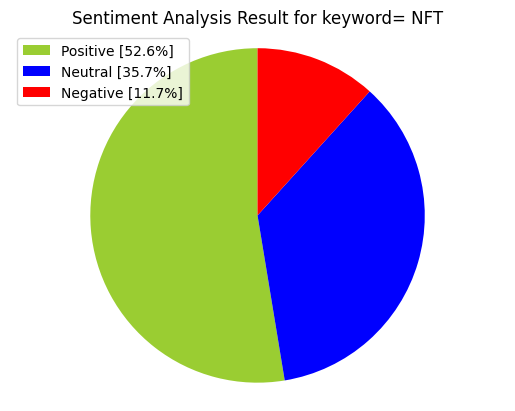

In [76]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import SnowballStemmer
import nltk
from PIL import Image




def percentage(part,whole):
    return 100 * float(part)/float(whole)
positive = 0
negative = 0
neutral = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []
for i in range(df_tweets.shape[0]):
 
    #print(columns.1]pxt)
    tweet_list.append(df_tweets.iloc[i,1])
    score = SentimentIntensityAnalyzer().polarity_scores(df_tweets.iloc[i, 1])
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
 
    if neg > pos:
        negative_list.append(df_tweets.iloc[i,1])
        negative += 1
    elif pos > neg:
        positive_list.append(df_tweets.iloc[i,1])
        positive += 1
    elif pos == neg:
        neutral_list.append(df_tweets.iloc[i,1])
        neutral += 1
positive = percentage(positive, df_tweets.shape[0])
negative = percentage(negative, df_tweets.shape[0])
neutral = percentage(neutral, df_tweets.shape[0])
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))
# total number:  1006
# positive number:  342
# negative number:  208
# neutral number:  456
#Creating PieCart
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword= "+"NFT"+"" )
plt.axis('equal')
plt.show()

In [77]:
positive_list.head()

0
0  playcryptoballz strong project    happy   part...
1  guppydfish  veezyvangogh  yommsies  isekaimeta...
2                         love    dm   nft community
3  anthonyhyphen please buy  nft    pay   student...
4  nft nftcollection   love  artwork https   co v...

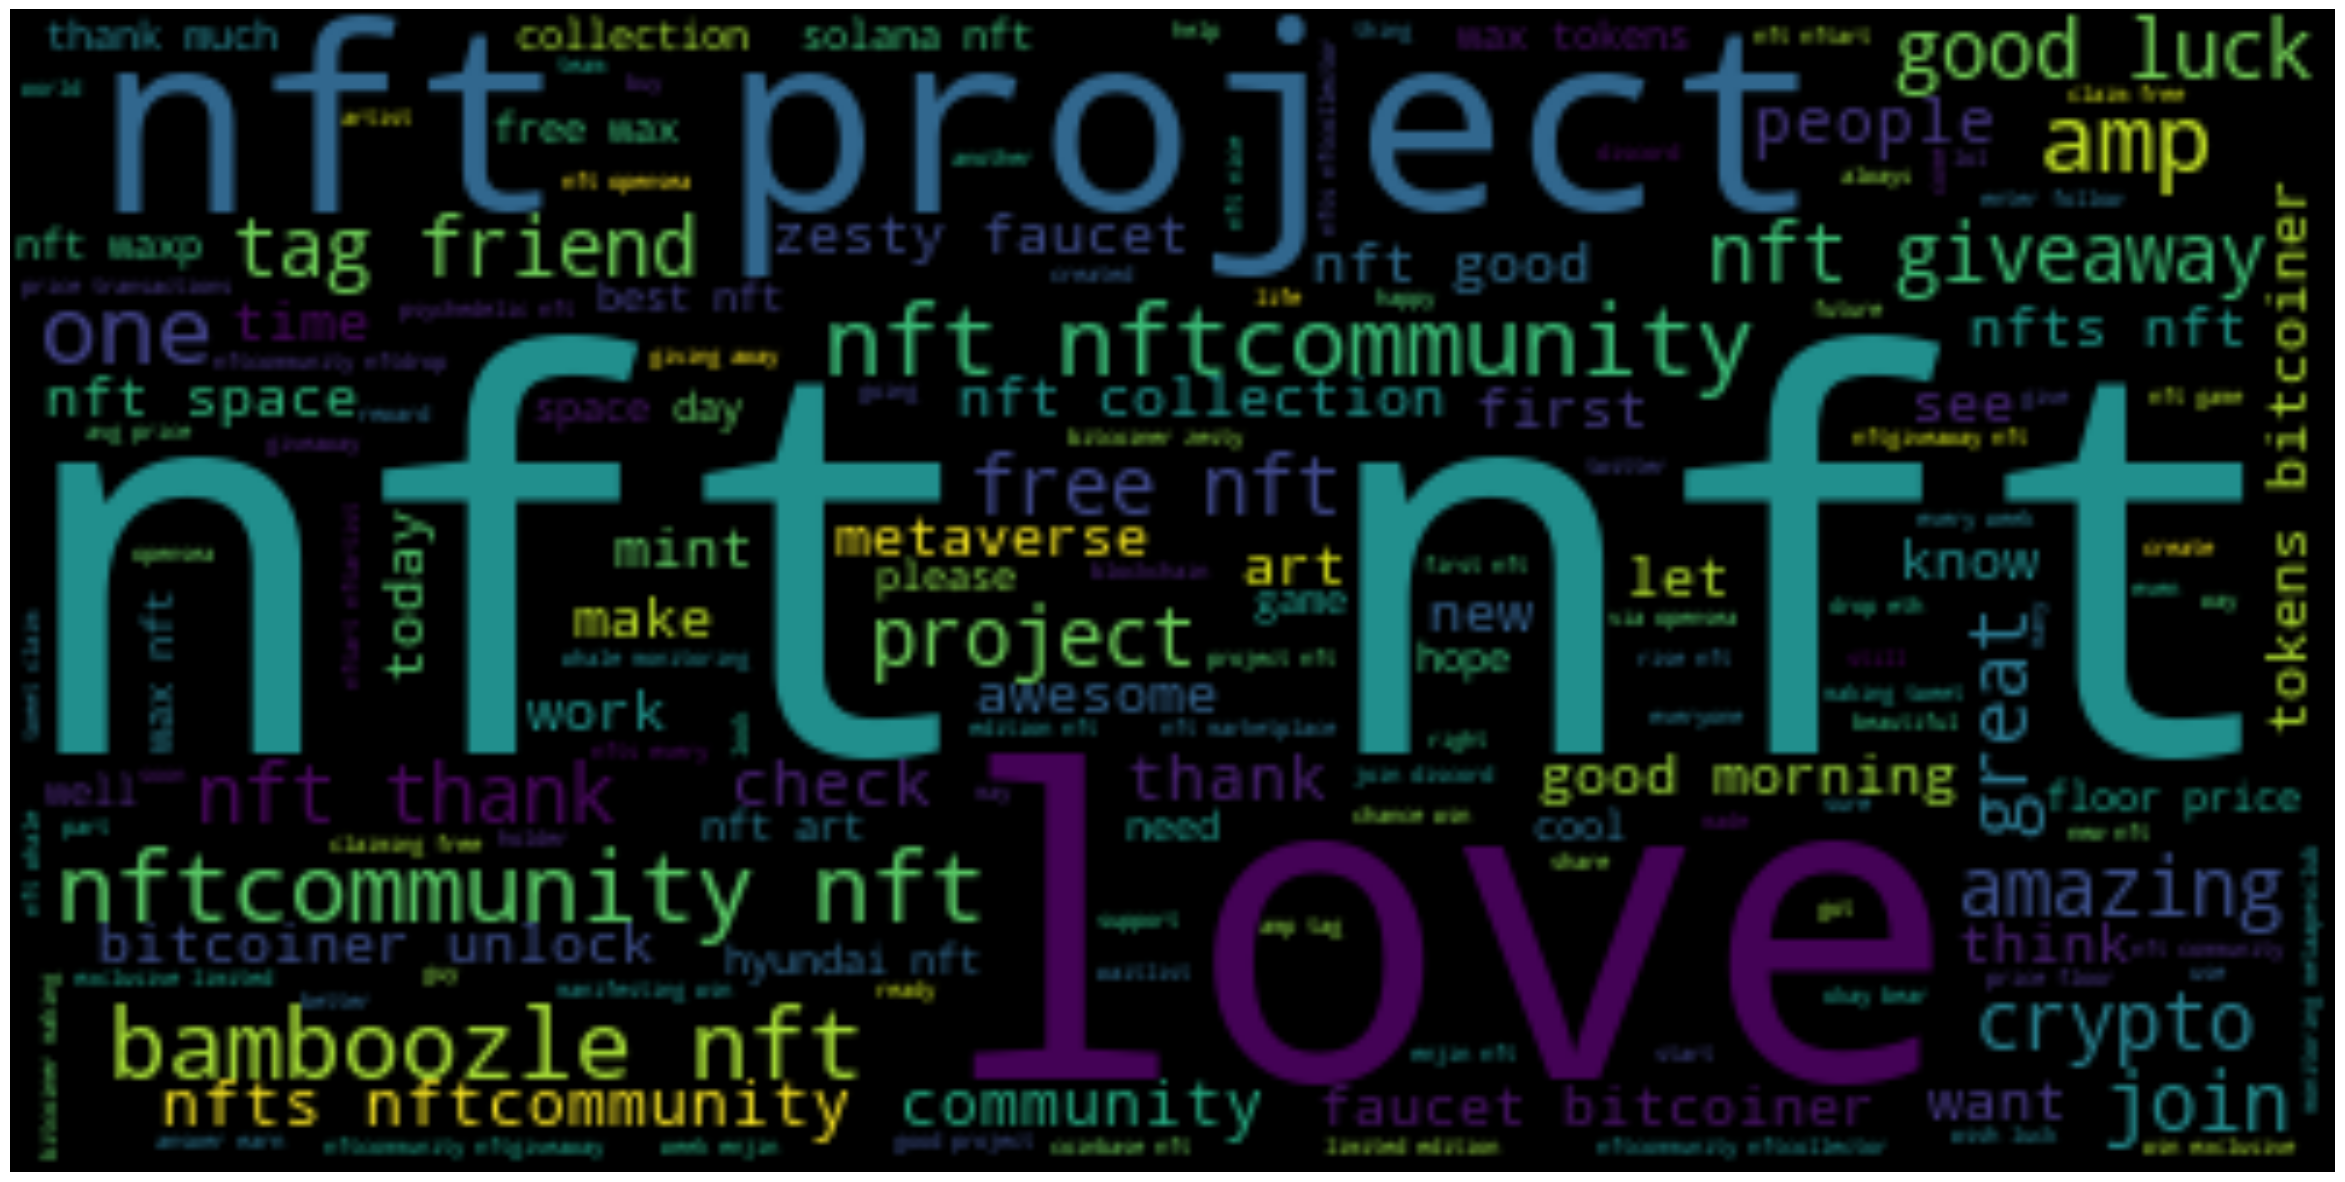

In [78]:
words_to_exclude = ["NFT", "Solana", "Ethereum", "https"]

wordcloud = create_wordcloud(' '.join(positive_list[0]))
fig = plt.figure(1,figsize=(30, 50))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

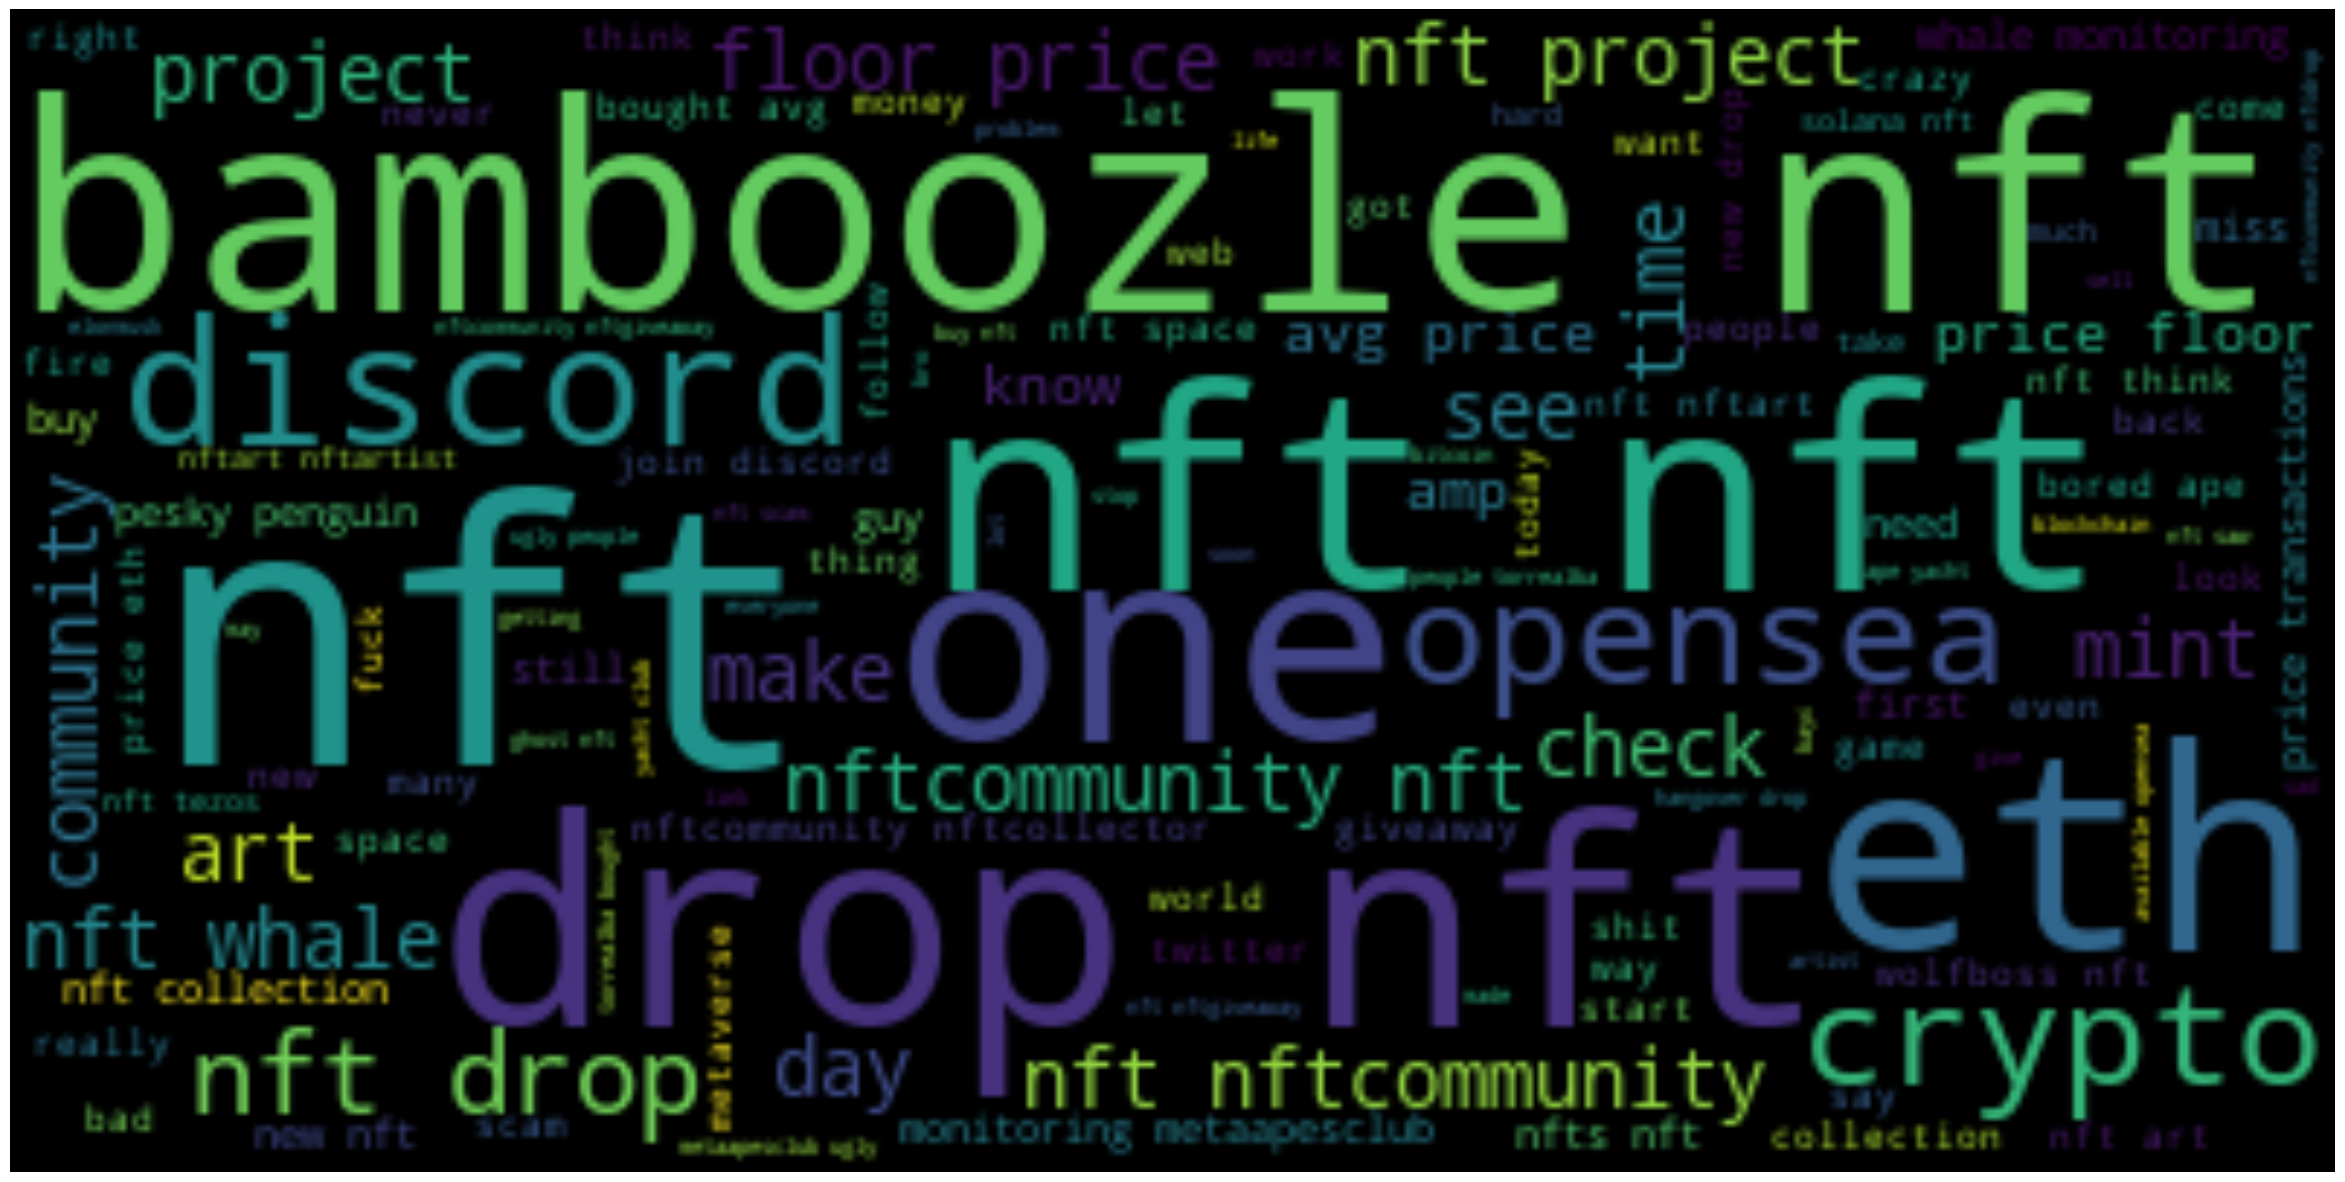

In [79]:
words_to_exclude = ["NFT", "Solana", "Ethereum", "https"]

wordcloud = create_wordcloud(' '.join(negative_list[0]))
fig = plt.figure(1,figsize=(30, 50))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [80]:
# create a dictionary of word frequencies
text = ' '.join(negative_list[0])
text_dictionary = wordcloud.process_text(text)
# sort the dictionary
word_freq={k: v for k, v in sorted(text_dictionary.items(),reverse=True, key=lambda item: item[1])}

#use words_ to print relative word frequencies
rel_freq = wordcloud.words_

#print results
print("Most frequent words")
print(list(word_freq.items())[0:50])
print("Least frequent words")
print(list(word_freq.items())[-100:-50])

Most frequent words
[('https', 2773), ('nft', 1944), ('bamboozle nft', 1312), ('drop nft', 716), ('nft nft', 467), ('nft https', 391), ('one', 311), ('crypto', 289), ('nft drop', 284), ('nft nftcommunity', 281), ('eth', 267), ('nftcommunity nft', 241), ('nft project', 237), ('check', 228), ('floor price', 226), ('discord https', 189), ('day', 181), ('time', 176), ('see', 173), ('discord', 170), ('art', 168), ('community', 164), ('make', 163), ('nft whale', 162), ('price floor', 157), ('avg price', 156), ('amp', 155), ('project', 155), ('know', 152), ('opensea', 152), ('whale monitoring', 152), ('monitoring metaapesclub', 152), ('price transactions', 152), ('mint', 150), ('opensea https', 147), ('buy', 146), ('nft collection', 141), ('first', 135), ('guy', 135), ('miss', 134), ('nfts nft', 133), ('new nft', 130), ('pesky penguin', 130), ('need', 127), ('still', 125), ('people', 124), ('nftcommunity nftcollector', 123), ('bored ape', 123), ('new', 122), ('join discord', 121)]
Least frequ

In [81]:
# create a dictionary of word frequencies
text = ' '.join(positive_list[0])
text_dictionary = wordcloud.process_text(text)
# sort the dictionary
word_freq={k: v for k, v in sorted(text_dictionary.items(),reverse=True, key=lambda item: item[1])}

#use words_ to print relative word frequencies
rel_freq = wordcloud.words_

#print results
print("Most frequent words")
print(list(word_freq.items())[0:50])
print("Least frequent words")
print(list(word_freq.items())[-100:-50])

Most frequent words
[('https', 11725), ('nft nft', 2344), ('nft https', 1792), ('love', 1544), ('nft project', 1254), ('nft nftcommunity', 1253), ('bamboozle nft', 972), ('amp', 964), ('nftcommunity nft', 963), ('nft giveaway', 888), ('one', 873), ('tag friend', 815), ('good luck', 791), ('nft thank', 788), ('free nft', 776), ('great', 774), ('project', 742), ('art', 734), ('nfts nftcommunity', 727), ('community', 718), ('nftcommunity https', 677), ('good morning', 675), ('people', 665), ('nft collection', 639), ('zesty faucet', 632), ('faucet bitcoiner', 632), ('tokens bitcoiner', 632), ('bitcoiner unlock', 632), ('time', 615), ('mint', 608), ('want', 602), ('crypto', 599), ('nft good', 594), ('see', 593), ('thank', 590), ('metaverse', 588), ('think', 585), ('nft space', 584), ('first', 572), ('opensea https', 552), ('join https', 548), ('check', 542), ('new', 535), ('make', 531), ('today', 528), ('know', 517), ('let', 511), ('nfts nft', 502), ('work', 499), ('amazing', 478)]
Least fr

In [82]:
# create a dictionary of word frequencies
text = ' '.join(tweet_list[0])
text_dictionary = wordcloud.process_text(text)
# sort the dictionary
word_freq={k: v for k, v in sorted(text_dictionary.items(),reverse=True, key=lambda item: item[1])}

#use words_ to print relative word frequencies
rel_freq = wordcloud.words_

#print results
print("Most frequent words")
print(list(word_freq.items())[0:50])
print("Least frequent words")
print(list(word_freq.items())[-100:-50])

Most frequent words
[('https', 19703), ('nft nft', 4324), ('nft https', 4133), ('opensea https', 2643), ('nft nftcommunity', 2390), ('bamboozle nft', 2323), ('nftcommunity nft', 1861), ('nft done', 1847), ('nft project', 1793), ('floor price', 1746), ('via opensea', 1746), ('nft giveaway', 1647), ('nft whale', 1507), ('done https', 1472), ('love', 1467), ('avg price', 1370), ('price floor', 1343), ('whale monitoring', 1328), ('monitoring metaapesclub', 1328), ('price transactions', 1328), ('nfts nftcommunity', 1266), ('nft collection', 1212), ('one', 1114), ('vril project', 1112), ('new nft', 1108), ('nft opensea', 1084), ('check nft', 1062), ('nfts nft', 1050), ('nft game', 1011), ('nftcommunity https', 1011), ('amp', 988), ('nft nftart', 947), ('mint', 919), ('know', 910), ('drop nft', 905), ('think', 895), ('project nft', 884), ('nft space', 853), ('see', 842), ('tag friend', 818), ('nft thank', 804), ('bought avg', 802), ('community', 799), ('solana nft', 797), ('free nft', 795), (